In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv("Imputed_data_Ivan.csv")
df

,LLHold,LLLatency,LRHold,LRLatency,RLHold,RLLatency,RRHold,RRLatency,LLHoldStd,LLLatencyStd,...,RHold,RLatency,LHoldStd,LLatencyStd,RHoldStd,RLatencyStd,LRHold_Diff,LLRRLatency_Diff,LRRLLatency_Diff,Parkinsons
0,97.654140,406.716242,107.138017,411.718182,100.917949,430.258974,96.400784,365.736471,25.840600,162.606085,...,101.628974,388.125956,99.047810,416.769161,101.628974,388.125956,-317.721350,40.979771,-18.540793,0
1,64.452941,390.058823,66.233333,600.433333,68.500000,536.407143,64.341176,394.647059,10.799197,199.162594,...,65.124138,479.800000,66.280645,456.151613,65.124138,479.800000,-389.870968,-4.588235,64.026190,0
2,143.399528,347.882547,105.325886,313.541489,163.700000,310.799454,106.208750,322.170833,51.115372,101.977747,...,105.731801,317.509004,152.804557,330.702279,105.731801,317.509004,-177.897722,25.711714,2.742036,0
3,144.314980,528.670445,180.632743,575.478761,156.391710,501.274093,159.277778,493.779630,42.482348,137.542548,...,166.612462,521.840426,147.707715,520.973945,166.612462,521.840426,-373.266230,34.890816,74.204668,0
4,124.285207,300.323155,127.421731,335.508287,125.795492,321.131506,124.941855,332.621036,21.626193,81.749015,...,126.101694,333.971404,124.899646,308.788745,126.101694,333.971404,-183.889100,-32.297880,14.376781,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,74.382119,233.183499,71.242987,249.604979,76.069314,282.845343,75.168615,262.600722,15.847420,68.129255,...,73.270363,256.316582,75.113043,254.697936,73.270363,256.316582,-179.584892,-29.417223,-33.240364,0
83,104.445555,284.901879,114.021725,215.023762,102.083155,255.127555,114.708130,271.448199,43.152219,144.554373,...,114.322981,239.787821,103.352986,271.131772,114.322981,239.787821,-167.778787,13.453680,-40.103793,0
84,103.366013,249.626144,141.265306,262.962245,104.287387,247.860360,147.900000,350.363077,24.085334,75.679672,...,143.911043,297.815337,103.753409,248.883712,143.911043,297.815337,-145.130303,-100.736933,15.101885,1
85,147.086450,505.747519,147.248437,456.021354,146.607565,580.315603,136.493676,545.699209,32.984655,139.372280,...,142.976923,491.639089,146.872545,539.055121,142.976923,491.639089,-392.182577,-39.951690,-124.294249,0


In [12]:
X = df.iloc[:,0:26]
y = df.iloc[:,27]  # Target is the Parkinsons column

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
## Now split the data
## Have 20% for testing
## Set 614 as the random state
## and stratify the split

## I'll wait before writing the code myself :)
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=.2,
                                                shuffle=True,
                                                random_state=614,
                                                stratify=y)

In [26]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=2000)

In [27]:
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [28]:
y_train_pred = log_reg.predict(X_train)

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(y_train, y_train_pred)

array([[38,  6],
       [ 9, 16]], dtype=int64)

In [35]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))

0.7272727272727273
0.64


In [38]:
probs = log_reg.predict_proba(X_train)


In [39]:
from sklearn.metrics import roc_curve

In [40]:
roc_curve(y_train,probs[:,1])

(array([0.        , 0.        , 0.        , 0.09090909, 0.09090909,
        0.13636364, 0.13636364, 0.22727273, 0.22727273, 0.27272727,
        0.27272727, 0.29545455, 0.29545455, 0.38636364, 0.38636364,
        0.45454545, 0.45454545, 0.5       , 0.5       , 0.75      ,
        0.75      , 0.79545455, 0.79545455, 1.        ]),
 array([0.  , 0.04, 0.56, 0.56, 0.64, 0.64, 0.68, 0.68, 0.72, 0.72, 0.76,
        0.76, 0.8 , 0.8 , 0.84, 0.84, 0.88, 0.88, 0.92, 0.92, 0.96, 0.96,
        1.  , 1.  ]),
 array([1.99883129e+00, 9.98831290e-01, 6.21838456e-01, 5.77088705e-01,
        5.32573657e-01, 5.06138030e-01, 4.90681312e-01, 4.41684445e-01,
        3.89435397e-01, 3.81738684e-01, 3.73088650e-01, 3.58441906e-01,
        3.20602808e-01, 2.83855865e-01, 2.30354632e-01, 2.26935431e-01,
        2.19702416e-01, 2.06364976e-01, 2.01856203e-01, 8.63596041e-02,
        8.36891742e-02, 7.37955762e-02, 7.26963462e-02, 4.05285003e-04]))

In [41]:
fpr,tpr,cutoffs = roc_curve(y_train,probs[:,1])

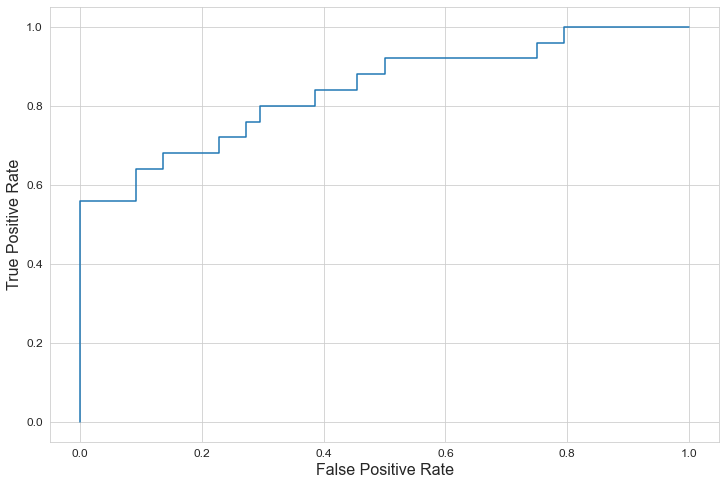

In [42]:
## Code here

## Sample Solution
plt.figure(figsize=(12,8))

plt.plot(fpr,tpr)

plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [43]:
from sklearn.metrics import roc_auc_score

In [44]:
roc_auc_score(y_train,probs[:,1])

0.8400000000000001